# Chapter 6

## Question 9

Regularisation on the `College` data set

In [92]:
import statsmodels.api as sm
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition
import sklearn.pipeline
import sklearn.cross_decomposition
import pandas as pd

In [13]:
college = sm.datasets.get_rdataset("College", "ISLR").data
college["Private"] = college["Private"] == "Yes"
college.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,True,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,True,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,True,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,True,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,True,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### (a) Split the data set into a training set and a test set

In [14]:
X = college.drop(columns=["Apps"])
y = college["Apps"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33)


### (b) Fit a linear model using least squares, and report the test error

In [23]:
least_squares = sklearn.linear_model.LinearRegression()
least_squares.fit(X_train,y_train)
y_pred = least_squares.predict(X_test)
least_squares_mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(least_squares_mse)

1543607.976923507


In [20]:
# The above is vast!

### (c) Fit a ridge regression model, choosing $\lambda$ by CV. Report the test error

In [32]:
ridge = sklearn.linear_model.RidgeCV(alphas= np.linspace(0.001,10,num=1000))
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
ridge_mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(ridge_mse)

1540869.3506382525


### (d) Fit a lasso model, choosing $\lambda$ by CV. Report the test error, along with the number of non-zero coefficients.

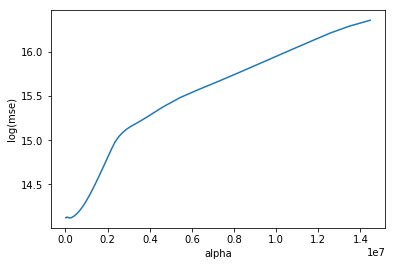

In [44]:
# Use the LassoCV
lasso_model = sklearn.linear_model.LassoCV(cv=5, max_iter=1e6)
lasso_model.fit(X_train,y_train)

mses = list(map(np.mean,lasso_model.mse_path_))
alphas = lasso_model.alphas_
plt.plot(alphas,np.log(mses))
plt.ylabel("log(mse)")
plt.xlabel("alpha")
plt.show()

In [45]:
print(lasso_model.coef_)
print(lasso_model.intercept_)

[-0.          1.13994327  0.          0.          0.          0.11204901
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.11235193  0.        ]
-791.1529529553018


In [46]:
y_pred = lasso_model.predict(X_test)
lasso_mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
lasso_mse

1900521.5684322468

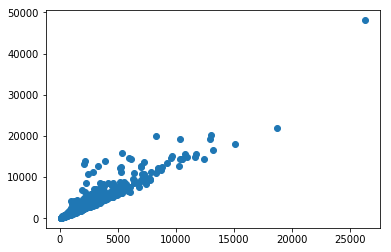

In [48]:
plt.scatter(college["Accept"], college["Apps"])  # Lasso suggests a roughly one-to-one mapping between these

### (e) Fit a PCR model, with M chosen by cross-validation. Report the test error, along with the value of M selected.

In [86]:
# Standardise each predictor:
scaler = sklearn.preprocessing.StandardScaler()
regressor = sklearn.linear_model.LinearRegression()
pca = sklearn.decomposition.PCA()

pipe = sklearn.pipeline.Pipeline(steps=[("scaling", scaler), ("pca", pca), ("linear regression", regressor)])

p = len(X_train.columns)
params = {"pca__n_components": list(range(1,p+1))}

search = sklearn.model_selection.GridSearchCV(pipe, params, cv=5, return_train_score=True)
search.fit(X_train, y_train)

/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/p

/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/p

/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/p

/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/p

/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/p

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('linear regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

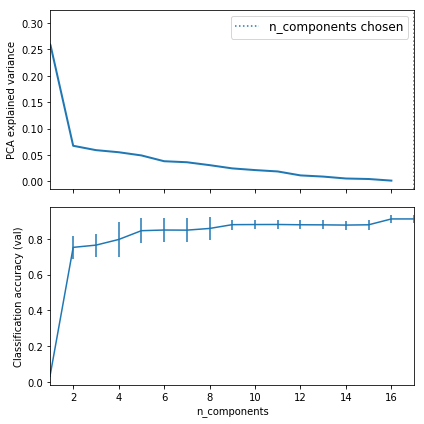

In [87]:
pca.fit(X_train_scaled)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.tight_layout()
plt.show()

In [91]:
# The above graph suggests PCR with 5 components.

pipe.set_params(pca__n_components=5).fit(X_train, y_train)
y_pred = pipe.predict(X_test)
pcr_mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
pcr_mse


/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


3945088.9482683092

### (f) Fit a PLS model, with M chosen by cross-validation. Report the test error, along with the value of M selected.

In [93]:
# Standardise each predictor:
# scaler = sklearn.preprocessing.StandardScaler()
pls = sklearn.cross_decomposition.PLSRegression()

# pipe = sklearn.pipeline.Pipeline(steps=[("scaling", scaler), ("pca", pca), ("linear regression", regressor)])

p = len(X_train.columns)
params = {"n_components": list(range(1,p+1))}

search = sklearn.model_selection.GridSearchCV(pls, params, cv=5, return_train_score=True)
search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [104]:
best_pls = search.best_estimator_
print(f"Number of components: {best_pls.n_components}")
y_pred = best_pls.predict(X_test)
pls_mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
pls_mse

Number of components: 10


1576177.7238843779

<ErrorbarContainer object of 3 artists>

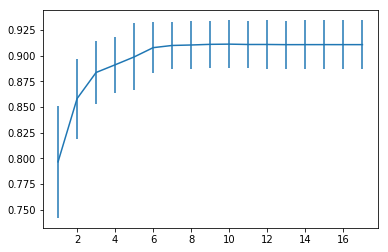

In [108]:
fig, ax = plt.subplots() 
results = pd.DataFrame(search.cv_results_)
results.head()

plt.errorbar(results.param_n_components, results.mean_test_score, yerr=results.std_test_score)

In [113]:
# Actually, M=6 looks best here.
pls = sklearn.cross_decomposition.PLSRegression(n_components=6)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)
pls_mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
pls_mse

1678375.598289568

### (g) Comment on the results

The MSE is atrocious! Off by over one million applications in all cases! And actually, only ridge regression improves on ordinary least squares, and even then only slightly.